# Exploring the Numerai Dataset

In this notebook we will go through
1. How to download the dataset
2. The structure of the dataset
3. The various files in the dataset

## 1. How to download the dataset

In [64]:
# NumerAPI is the official Python client for Numerai
from numerapi import NumerAPI
import pandas as pd
import json
napi = NumerAPI()
pd.set_option('display.max_rows', 10)

In [65]:
# Let's start by downloading the training data and feature metadata
# This may take a few minutes 🍵
napi.download_dataset("v4.1/train.parquet")
napi.download_dataset("v4.1/features.json")

2023-03-30 22:49:24,115 INFO numerapi.utils: target file already exists
2023-03-30 22:49:24,116 INFO numerapi.utils: download complete
2023-03-30 22:49:24,513 INFO numerapi.utils: target file already exists
2023-03-30 22:49:24,514 INFO numerapi.utils: download complete


In [66]:
# To avoid loading the entire dataset into memory, we will only load a subset of the columns
feature_metadata = json.load(open("v4.1/features.json")) 
features = feature_metadata["feature_sets"]["small"]
training_data = pd.read_parquet("v4.1/train.parquet", columns=["era"] + features + ["target"]) 

## 2. The structure of the dataset
At a high level, each row represents a stock on a specific historical date
- The `era` number represents the date 
- The `features` are quantitative measures of the stock known on the date
- The `target` is a quantitative measures of forward-looking returns relative to the date  

Your task is to predict the forward-looking `target` using live `features` known today.

In [67]:
training_data

,era,feature_bijou_penetrant_syringa,feature_burning_phrygian_axinomancy,feature_coraciiform_sciurine_reef,feature_corporatist_seborrheic_hopi,feature_cyclopedic_maestoso_daguerreotypist,feature_distressed_bloated_disquietude,feature_ecstatic_foundational_crinoidea,feature_elaborate_intimate_bor,feature_entopic_interpreted_subsidiary,...,feature_tragical_rainbowy_seafarer,feature_ugrian_schizocarpic_skulk,feature_undisguised_unenviable_stamen,feature_undrilled_wheezier_countermand,feature_unpainted_censual_pinacoid,feature_unreproved_cultish_glioma,feature_unsizable_ancestral_collocutor,feature_unswaddled_inenarrable_goody,feature_unventilated_sollar_bason,target
id,,,,,,,,,,,,,,,,,,,,,
n003bba8a98662e4,0001,0.00,0.00,0.50,1.00,0.50,0.50,0.00,0.50,0.50,...,0.00,0.00,1.00,0.75,1.00,1.00,0.50,0.25,0.00,0.25
n003bee128c2fcfc,0001,0.50,0.75,0.50,0.25,0.50,0.75,1.00,0.75,1.00,...,1.00,0.25,0.25,0.25,1.00,0.25,0.50,0.75,0.25,0.75
n0048ac83aff7194,0001,0.25,0.25,1.00,0.75,0.75,0.75,0.75,0.75,0.00,...,0.50,1.00,1.00,0.75,0.00,0.25,1.00,0.75,1.00,0.50
n00691bec80d3e02,0001,0.75,0.75,0.75,0.25,0.25,0.00,0.00,0.00,0.25,...,0.75,0.75,0.25,0.50,1.00,0.00,0.50,0.50,0.75,0.75
n00b8720a2fdc4f2,0001,0.00,0.00,0.00,1.00,0.25,0.25,0.75,0.25,0.00,...,0.75,0.00,1.00,0.25,1.00,0.00,0.00,1.00,0.00,0.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
nffcc1dbdf2212e6,0574,1.00,0.25,0.75,1.00,0.75,1.00,0.25,1.00,0.00,...,0.50,1.00,0.75,0.75,0.75,0.25,1.00,0.50,1.00,0.75
nffd71b7f6a128df,0574,0.75,0.00,0.50,0.50,0.00,0.25,0.00,0.00,0.00,...,0.75,0.50,0.00,0.00,0.00,1.00,0.25,0.25,0.50,0.00
nffde3b371d67394,0574,0.75,0.00,1.00,1.00,0.75,1.00,0.00,1.00,0.25,...,0.25,1.00,1.00,1.00,0.50,0.50,1.00,1.00,1.00,0.25


<Axes: title={'center': 'Number of Rows per Era'}, xlabel='era'>

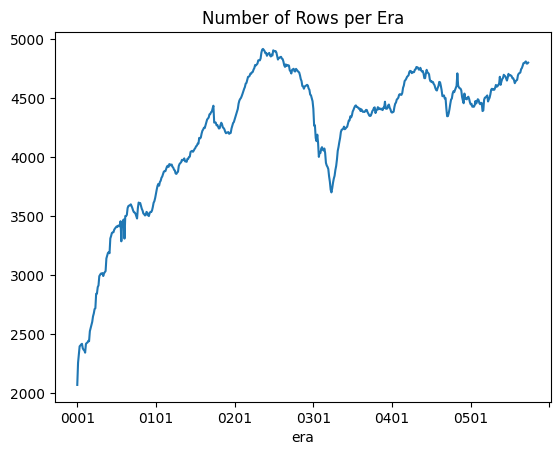

In [68]:
# The number of rows per era changes over time
# This correspondss to the number stocks in Numerai's investable universe
training_data.groupby("era").size().plot(title="Number of Rows per Era")

In [69]:
# Feature columns are prefixed with "feature_"
# Feature names are randomly generated and have no special meaning
# The underlying financial concepts behind each feature is not important to understand
# Just know that the Numerai has engineered these features to be predictive of the target
features[:10]

['feature_bijou_penetrant_syringa',
 'feature_burning_phrygian_axinomancy',
 'feature_coraciiform_sciurine_reef',
 'feature_corporatist_seborrheic_hopi',
 'feature_cyclopedic_maestoso_daguerreotypist',
 'feature_distressed_bloated_disquietude',
 'feature_ecstatic_foundational_crinoidea',
 'feature_elaborate_intimate_bor',
 'feature_entopic_interpreted_subsidiary',
 'feature_esculent_erotic_epoxy']

<Axes: ylabel='Frequency'>

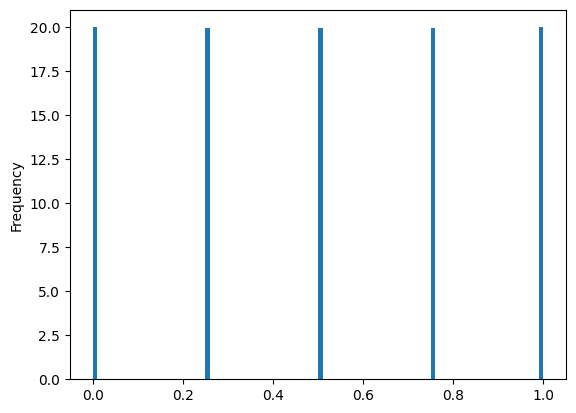

In [70]:
# Feature values are all between 0 and 1 and binned into 5 equal bins 
# This form of regularization is commonly used in finance to reduce overfitting on noisy data
training_data[features[0]].plot(kind="hist", bins=100, density=True)

<Axes: ylabel='Frequency'>

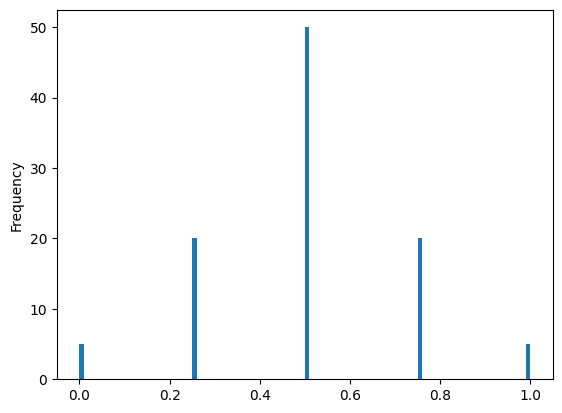

In [71]:
# The target value is binned into 5 unequal bins
training_data["target"].plot(kind="hist", bins=100, density=True)

#### 3. The files in the dataset

The Numerai dataset consists of 3 key files
- `train` (static): historical data where targets are known 
- `validation` (updates weekly): recent historical data once targets are known 
- `live` (updates daily): the current data where targets are unknown

These files come in various formats
- `.csv` with floats: easiest to open 
- `.parquet` with floats: more compact
- `.parquet` with int8: most compact


In [72]:
# Let's see what other files are available in v4.1
[f for f in napi.list_datasets() if f.startswith("v4.1")]

['v4.1/features.json',
 'v4.1/live.parquet',
 'v4.1/live_example_preds.csv',
 'v4.1/live_example_preds.parquet',
 'v4.1/live_int8.parquet',
 'v4.1/meta_model.parquet',
 'v4.1/train.parquet',
 'v4.1/train_int8.parquet',
 'v4.1/validation.parquet',
 'v4.1/validation_example_preds.csv',
 'v4.1/validation_example_preds.parquet',
 'v4.1/validation_int8.parquet']